In [ ]:
#                                                         Project-1
#                                               Digit-Recognition  Using  SVM
#                                                  Dataset 9: One_Two_Three                 

# Importing Required Libraries and Modules

In [1]:
import glob
#import librosa as lb
import numpy as np
import pandas as pd

# Importing the Dataset
e.g. images from the folder One_Two_Three


In [2]:
files_tr = glob.glob("C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three/*.jpg")
#By running the following line, we see the files which we've taken. 
files_tr

['C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_001.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_002.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_003.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_004.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_005.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_006.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_007.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_008.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_009.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\one_010.jpg',
 'C:/Users/Satyam/Downloads/One_Two_Three-20180714T102351Z-001/One_Two_Three\\on

# Data Preprocessing

In [3]:
a=[]
for file in files_tr:
    data = file.split('/')
    ctr =0
    ctr1 = 1
    for temp in data:
        ctr = ctr+1
        if(ctr==6):
            data2 = temp.split('\\')
            for temp2 in data2:
                ctr1=ctr1+1
                if(ctr1==1):
                    print(temp2)
    myfile = temp2.split()[0][1]
    if(myfile=='n'):
        a.append(0)
    if(myfile=='h'):
        a.append(1)
    if(myfile=='w'):
        a.append(2)
y_train = np.array(a)

In [4]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [5]:
y_train.shape

(89,)

Analyzing Datasets: checking the dimensions of the data 

In [7]:
# Importing Other useful Libraries and modules:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [8]:
image = Image.open(files_tr[0])
im = image.convert('L')
im_array = np.array(im)
im_array.flatten().shape

(3500,)

☝☝☝ This implies that the number of columns in our dataset should be 3500.
Hence we create a arr_train of 3500.

 #1. Creating arr_train of 3500 columns
 #2. For each image in list files_tr:
 
     a) Open the image file
     b) Convert the file to Grey-Scale using Python image library PIL
     c) Storing the greyscale image in an array
     d) flattening the image and storing it into a stack(LIFO) for smooth processing

In [9]:
arr_train = np.empty((3500))
 
for file in files_tr:
    image = Image.open(file)
    # CONVERSION TO GREY-SCALE
    im = image.convert('L')
    # Storing the GreyScale image into array
    im_array = np.array(im)  
    print(im_array.flatten())
    # Flattening the greyscale image and storing into a stack
    arr_train = np.vstack((arr_train, im_array.flatten()))

[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 255 ... 253 255 234]
[255 255 2

In [10]:
# Checking the shape of arr_train:

arr_train.shape

(90, 3500)

In [11]:
# Formatting the number of Rows as per the y_train data, as y_train.shape=(89,)

arr_train=arr_train[:89,]
arr_train.shape

(89, 3500)

In [12]:
# The model_selection library of the Scikit-Learn library contains the train_test_split method 
# that allows us to split data into training and test sets
# importing train_test_split function from sklearn library
# for splitting the data-set into training and testing sets.

from sklearn.model_selection import train_test_split

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(arr_train, y_train, random_state=0)

In [14]:
# putting the Xtrain value into DataFrame

pd.DataFrame(Xtrain)

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
1,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
2,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
3,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
4,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
5,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
6,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
7,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
8,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02
9,2.550000e+02,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,255.0,2.550000e+02,2.550000e+02,2.550000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.550000e+02,2.340000e+02


# Training the SVM Algorithm on Training Data:


In [15]:
# Importing different functions and classes from sklearn for implementing SVM algorithm:
# Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms.
# Since we are going to perform a classification task, we will use the support vector classifier class, 
# which is written as SVC in the Scikit-Learn's svm library. 
# This class takes one parameter, which is the kernel type. 


from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\Satyam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Using Kernel = Linear

In [16]:
clf = svm.SVC(kernel='linear')
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Making Predictions

In [17]:
y_pred = clf.predict(Xtest)

# Evaluating the Algorithm

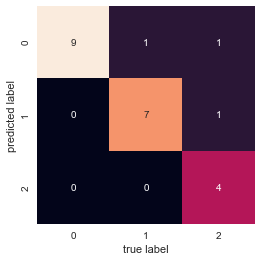

In [18]:
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [19]:
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90         9
          1       0.88      0.88      0.88         8
          2       1.00      0.67      0.80         6

avg / total       0.89      0.87      0.87        23



Printing the Score:

In [20]:
score = clf.score(Xtest,ytest)
print(score)

0.8695652173913043


# Using Kernel = Polynomial

In [21]:
clf = svm.SVC(kernel='poly')
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(Xtest)

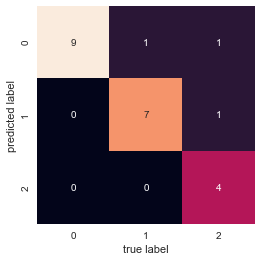

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90         9
          1       0.88      0.88      0.88         8
          2       1.00      0.67      0.80         6

avg / total       0.89      0.87      0.87        23



Printing the Score:-

In [25]:
score = clf.score(Xtest,ytest)
print(score)

0.8695652173913043


# Using Kernel = 'rbf'   ==>   Gaussian Kernel

In [26]:
clf = svm.SVC(kernel='rbf')
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_pred = clf.predict(Xtest)

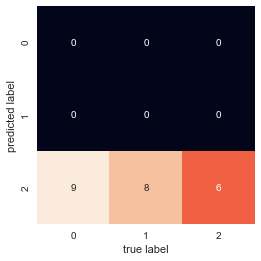

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00         8
          2       0.26      1.00      0.41         6

avg / total       0.07      0.26      0.11        23



C:\Users\Satyam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Printing the Score:-

In [30]:
score = clf.score(Xtest,ytest)
print(score)

0.2608695652173913


# Using Sigmoid Kernel

In [31]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred = clf.predict(Xtest)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
print(classification_report(ytest,y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00         8
          2       0.26      1.00      0.41         6

avg / total       0.07      0.26      0.11        23



C:\Users\Satyam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Printing the Score:-

In [34]:
score = clf.score(Xtest,ytest)
print(score)

0.2608695652173913


# RESULT - Comparison of Kernel Performance

So, Now after comparing the performances of the different types of kernels we can clearly see that,
the Sigmoid kernel, and Gaussian kernel predicts the worst according to the Confusion-Matrix, and
both having a low score = 0.2608695652173913.


Amongst the Sigmoid kernel, Gaussian kernel and Polynomial kernel, we can see that,
the Polynomial kernel achieved a better result, according to the Confusion-Matrix.
However, the Linear-Kernel achieved the best result among all the kernels, with a score of 0.8695652173913043.